In [122]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [123]:
from pathlib import Path

if "workding_dir" not in locals():
    try:
        from google.colab import drive

        drive.mount("/content/drive")
        workding_dir = "/content/drive/MyDrive/logical-reasoning/"
    except ModuleNotFoundError:
        workding_dir = str(Path.cwd().parent)

In [124]:
import os
import sys
from pathlib import Path

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/projects/logical-reasoning


In [125]:
# haotian comp
import os
import sys
from pathlib import Path

if "workding_dir" not in locals():
    workding_dir = str(Path.cwd().parent)
os.chdir(workding_dir)
sys.path.append(workding_dir)
print("working dir:", workding_dir)

working dir: /Users/inflaton/code/engd/projects/logical-reasoning


In [126]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/projects/logical-reasoning/.env


True

In [127]:
model_orders = {
    "Mistral-7B-v0.3-Chinese-Chat": 5,
    "internlm2_5-7b-chat-1m": 10,
    "Qwen2-7B-Instruct": 20,
    "Llama3.1-8B-Chinese-Chat": 30,
    "Llama3.1-70B-Chinese-Chat": 40,
    "Qwen2-72B-Instruct": 50,
}

In [128]:
markers = [
    "o",
    "x",
    "^",
    "s",
    "d",
    "P",
    "X",
    "*",
    "v",
    ">",
    "<",
    "p",
    "h",
    "H",
    "+",
    "|",
    "_",
]
model_markers = {k: markers[i] for i, k in enumerate(model_orders.keys())}

In [129]:
import pandas as pd

perf_df = None
model_perf_dfs = {}
for model_name in model_orders.keys():
    metrics_csv = f"data/{model_name}_metrics.csv"
    if not Path(metrics_csv).exists():
        continue
    df = pd.read_csv(metrics_csv)
    model_perf_dfs[model_name] = df
    perf_df = df if perf_df is None else pd.concat([perf_df, df])

perf_df

epoch                                              model  accuracy  \
0     0.0  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat_torc...  0.711333   
1     0.2  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/chec...  0.702000   
2     0.4  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/chec...  0.742000   
3     0.6  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/chec...  0.659667   
4     0.8  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/chec...  0.714667   
..    ...                                                ...       ...   
2     0.4  Qwen/Qwen2-72B-Instruct/checkpoint-70_torch.bf...  0.736667   
3     0.6  Qwen/Qwen2-72B-Instruct/checkpoint-105_torch.b...  0.757000   
4     0.8  Qwen/Qwen2-72B-Instruct/checkpoint-140_torch.b...  0.789333   
5     1.0  Qwen/Qwen2-72B-Instruct/checkpoint-175_torch.b...  0.737667   
6     1.2  Qwen/Qwen2-72B-Instruct/checkpoint-210_torch.b...  0.763000   

    precision    recall        f1  ratio_valid_classifications  
0    0.702205  0.711333  0.689497                        0.004  
1    0.793273  0.702000  0.734271                        1.000  
2    0.789829  0.742000  0.753668                        1.000  
3    0.792340  0.659667  0.706754                        1.000  
4    0.786134  0.714667  0.740468                        1.000  
..        ...       ...       ...                          ...  
2    0.822487  0.736667  0.770063                        1.000  
3    0.825382  0.757000  0.784000                        1.000  
4    0.822910  0.789333  0.803312                        1.000  
5    0.824365  0.737667  0.769962                        1.000  
6    0.831888  0.763000  0.790108                        1.000  

[62 rows x 7 columns]

In [130]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

def plot_perf(
    model_perf_dfs,
    model_markers,
    x_major_locator=0.2,
    y_offset=0.005,
):
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))

    for model_name, perf_df in model_perf_dfs.items():
        # Ensure the lengths of perf_df["epoch"], perf_df["accuracy"], and perf_df["f1"] are the same
        min_length = min(len(perf_df["epoch"]), len(perf_df["accuracy"]), len(perf_df["f1"]))
        perf_df = perf_df.iloc[:min_length]

        (line,) = ax.plot(
            perf_df["epoch"],
            perf_df["f1"],
            marker=model_markers[model_name],
            label=model_name,
        )

        line_color = line.get_color()

        best_f1 = perf_df["f1"].idxmax()
        print(f"Best F1 for {model_name}: {perf_df['f1'].iloc[best_f1]}")
        ax.annotate(
            f"{perf_df['f1'].iloc[best_f1]*100:.2f}%",
            (perf_df["epoch"].iloc[best_f1], perf_df["f1"].iloc[best_f1]),
            ha="center",
            va="bottom",
            xytext=(0, 0),
            textcoords="offset points",
            fontsize=10,
            color=line_color,
        )

    # Set y-axis limit
    y_scales = ax.get_ylim()
    ax.set_ylim(y_scales[0], y_scales[1] + y_offset)

    # Add title and labels
    ax.set_xlabel("Epoch (0: base model, 0.2 - 2: fine-tuned models)")
    ax.set_ylabel("F1 Score")

    # Set x-axis grid spacing to 0.2
    ax.xaxis.set_major_locator(MultipleLocator(x_major_locator))
    ax.set_title(
        "Performance Analysis Across Checkpoints for Models"
    )

    # Rotate x labels
    plt.xticks(rotation=0)
    plt.grid(True)
    # plt.tight_layout()

    # Set legend at the right to avoid overlapping with lines
    plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))

    plt.show()

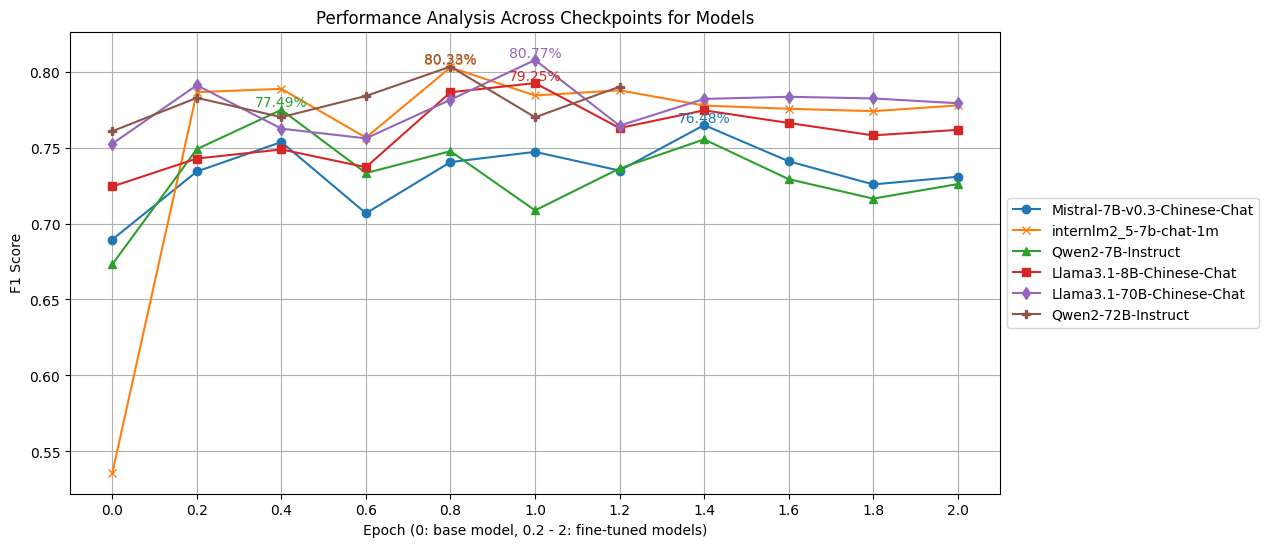

In [131]:
plot_perf(model_perf_dfs, model_markers)